In [74]:
import numpy as np
import vedo
import os
from tqdm import tqdm
from MeshObject import *
import pandas as pd

shape_path = "../ShapeDatabase_INFOMR"
# HISTOGRAM FOR EACH NORMALIZATION STEP
# FOR PCA STEP - COMPUTE PCA FIRST, THEN COMPUTE PCA SECOND TIME ON ALIGNED SHAPE = IF DOT PRODUCT IS 1 FOR ONE (OR ALL?) AXIS - IT'S ALL GOOD

In [2]:
def object_statistics(mesh: MeshObject):
    return {
        "name": mesh.name,
        "class": mesh.class_type,
        "nfaces": mesh.n_faces,
        "nvertices": mesh.n_vertices,
        "face_type": mesh.face_type,
        "bounding_box": mesh.bounding_box
    }

def dataset_statistics(shape_path):
    #### BOUNDING BOX!! AXIS ALIGNED VIA XMAX-XMIN - compare with builtin bounds()
    stats = {
        "name": [],
        "class": [],
        "nfaces": [],
        "nvertices": [],
        "face_type": [],
        "bounding_box": []
    }

    # remove any directories that might not contain .obj files
    classes = [class_type for class_type in os.listdir(shape_path) if os.path.isdir((os.path.join(shape_path, class_type))) and class_type != ".git"]
    for class_type in tqdm(classes):
        class_path = os.path.join(shape_path, class_type)

        for obj_name in os.listdir(class_path):
            obj_path = os.path.join(class_path, obj_name)
            obj = MeshObject(obj_path, False, name=obj_name, class_type=class_type)

            # add to global dictionary
            obj_stats = object_statistics(obj)
            for attribute in stats.keys():
                stats[attribute].append(obj_stats[attribute]) 

    return stats

stats = dataset_statistics(shape_path)

100%|██████████| 69/69 [00:42<00:00,  1.61it/s]


In [3]:
df = pd.DataFrame(stats)
# df.to_csv("refined_data_statistics.csv", index=False)
df.to_pickle("refined_data_statistics.pickle")
df

,name,class,nfaces,nvertices,face_type,bounding_box
0,m433.obj,House,10711,5652,triangle,"[-0.48583356, 0.51416641, -0.45076078, 0.50911..."
1,m440.obj,House,11258,5587,triangle,"[-0.45707998, 0.54292005, -0.32674372, 0.41897..."
2,m448.obj,House,11136,5616,triangle,"[-0.47320113, 0.49525076, -0.37081447, 0.62918..."
3,D00359.obj,House,10400,8237,triangle,"[-0.52355188, 0.47644818, -0.44474083, 0.43249..."
4,D00389.obj,House,10305,6658,triangle,"[-0.46475923, 0.53524077, -0.40769732, 0.38256..."
...,...,...,...,...,...,...
2478,m666.obj,Gun,11210,5615,triangle,"[-0.37021932, 0.62978065, -0.21206075, 0.29624..."
2479,D00929.obj,Gun,10660,5659,triangle,"[-0.39611125, 0.60388875, -0.27635112, 0.30413..."
2480,m664.obj,Gun,11206,5619,triangle,"[-0.4855535, 0.51444656, -0.23259662, 0.266829..."
2481,m650.obj,Gun,11052,5702,triangle,"[-0.39906406, 0.60093588, -0.2425366, 0.295437..."


# Finding different shapes accroding to vertex/face count

In [4]:
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
avg_vertex_num = np.mean(df.nvertices)
avg_face_num = np.mean(df.nfaces)

vertex_avg = np.argmin([abs(shape-avg_vertex_num) for shape in df.nvertices.to_numpy()])
face_avg = np.argmin([abs(shape-avg_face_num) for shape in df.nfaces.to_numpy()])

vertex_min = np.argmin(df.nvertices.to_numpy())
face_min = np.argmin(df.nfaces.to_numpy())

vertex_max = np.argmax(df.nvertices.to_numpy())
face_max = np.argmax(df.nfaces.to_numpy())

print(f"ID of shape with an average count of vertices {vertex_avg}={df.iloc[vertex_avg].nvertices}, with the average number being {avg_vertex_num:.3f}")
print(f"ID of shape with an average count of vertices {face_avg}={df.iloc[face_avg].nfaces}, with the average number being {avg_face_num:.3f}")
print("-----------------")
print(f"ID of shape with lowest count of vertices {vertex_min}={df.iloc[vertex_min].nvertices}")
print(f"ID of shape with lowest count of faces {face_min}={df.iloc[face_min].nfaces}")
print("-----------------")
print(f"ID of shape with highest count of vertices {vertex_max}={df.iloc[vertex_max].nvertices}")
print(f"ID of shape with highest count of faces {face_max}={df.iloc[face_max].nfaces}")

ID of shape with an average count of vertices 986=5898, with the average number being 5897.300
ID of shape with an average count of vertices 209=10907, with the average number being 10907.060
-----------------
ID of shape with lowest count of vertices 372=1448
ID of shape with lowest count of faces 513=1869
-----------------
ID of shape with highest count of vertices 1406=98193
ID of shape with highest count of faces 1960=77239


## Average shape

In [6]:
avg_shape_vertex = df.iloc[vertex_avg]
avg_shape_face = df.iloc[face_avg]
avg_shape_vertex, avg_shape_face

(name                                                    m1588.obj
 class                                                       Train
 nfaces                                                      10718
 nvertices                                                    5898
 face_type                                                triangle
 bounding_box    [-0.47934127, 0.52065879, -0.10349994, 0.33675...
 Name: 986, dtype: object,
 name                                                     m837.obj
 class                                                   MultiSeat
 nfaces                                                      10907
 nvertices                                                    5780
 face_type                                                triangle
 bounding_box    [-0.49967709, 0.50032288, -0.24476816, 0.25374...
 Name: 209, dtype: object)

In [7]:
os.path.join(shape_path, avg_shape_vertex["class"], avg_shape_vertex["name"])

'../ShapeDatabase_INFOMR/Train/m1588.obj'

In [8]:
mesh = MeshObject(os.path.join(shape_path, avg_shape_vertex["class"], avg_shape_vertex["name"]), visualize=True, name=avg_shape_vertex["name"], class_type=avg_shape_vertex["class"])
mesh.plotter.title = "Average shape in terms of number of vertices"
mesh.show()

In [9]:
mesh = MeshObject(os.path.join(shape_path, avg_shape_face["class"], avg_shape_face["name"]), visualize=True)
mesh.plotter.title = "Average shape in terms of number of faces"
mesh.show()

## Minimum shape

In [10]:
min_shape_vertex = df.iloc[vertex_min]
min_shape_face = df.iloc[face_min]
min_shape_vertex, min_shape_face

(name                                                   D00683.obj
 class                                                       Spoon
 nfaces                                                       2861
 nvertices                                                    1448
 face_type                                                triangle
 bounding_box    [-0.36636421, 0.63363582, -0.13635774, 0.14817...
 Name: 372, dtype: object,
 name                                                   D00564.obj
 class                                                      Rocket
 nfaces                                                       1869
 nvertices                                                    5607
 face_type                                                triangle
 bounding_box    [-0.42101085, 0.57898915, -0.098556131, 0.1049...
 Name: 513, dtype: object)

In [11]:
mesh = MeshObject(os.path.join(shape_path, min_shape_vertex["class"], min_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of vertices"
mesh.show()

In [12]:
mesh = MeshObject(os.path.join(shape_path, min_shape_face["class"], min_shape_face["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of faces"
mesh.show()

## Maximum

In [13]:
max_shape_vertex = df.iloc[vertex_max]
max_shape_face = df.iloc[face_max]
max_shape_vertex, max_shape_face

(name                                                   D00159.obj
 class                                                PlantIndoors
 nfaces                                                      32731
 nvertices                                                   98193
 face_type                                                triangle
 bounding_box    [-0.47549793, 0.5245021, -0.41935509, 0.450282...
 Name: 1406, dtype: object,
 name                                                   D00634.obj
 class                                                     Biplane
 nfaces                                                      77239
 nvertices                                                   48933
 face_type                                                triangle
 bounding_box    [-0.4999958, 0.50000423, -0.27453434, 0.524600...
 Name: 1960, dtype: object)

[vedo.mesh:460] INFO: 
 --------- Non manifold faces ---------
 Average tol.   :  0.8667 +-  0.5334
 Removed faces  : 100
 Recovered faces: 0



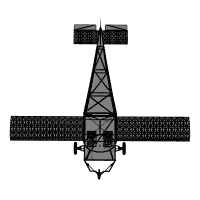

In [14]:
MeshObject(shape_path + "/Biplane/m1120.obj", visualize=True).non_manifold_faces(tol=0).fill_holes()

In [15]:
mesh = MeshObject(os.path.join(shape_path, max_shape_vertex["class"], max_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of vertices"
mesh.show()

In [16]:
mesh = MeshObject(os.path.join(shape_path, max_shape_face["class"], max_shape_face["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of faces"
mesh.show()

In [17]:
df[df["class"] == "Skyscraper"].nvertices.max()

np.int64(10042)

# Overall statistics

In [243]:
def plot_attribute(df, attribute_x, attribute_y, estimator,old_mean):
    label_name_map = {
        "nvertices": "vertices",
        "nfaces": "faces",
        "class": "shapes"
    }

    aux_df = df
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(16,9))
    if type(df[attribute_y].iloc[0]) is not str:
        mean_value_attribute = np.mean(df[attribute_y])
        aux_df = df.sort_values(attribute_x, ascending=False).reset_index(drop=True)
        sns.barplot(data=aux_df, y=attribute_y, x=attribute_x, estimator=estimator) # switch to sum/mean - mean might not be best?
    else:
        mean_value_attribute = np.mean(aux_df["class"].value_counts())
        sns.countplot(data=aux_df, x="class", order=aux_df["class"].value_counts().index) # switch to sum/mean - mean might not be best?
        
    plt.xticks(rotation=90)
    sns.despine()
    if type(df[attribute_y].iloc[0]) is not str:
        plt.text(x=64, y=old_mean + mean_value_attribute*0.05, s=f"{old_mean}", color="red")
    else:
        plt.text(x=64, y=old_mean + 2, s=f"{mean_value_attribute:.3f}", color="red")

    plt.hlines(y=old_mean, xmin=-1, xmax=69, colors="red", linestyles="dashed")
    plt.xlim((-1,69))
    plt.xlabel("Class")
    plt.ylabel(f"Number of {label_name_map[attribute_y]}")
    name = f"normalized_{attribute_x}_{attribute_y}_plot.png"
    plt.savefig(name)
    plt.show()

In [59]:
len(df[df["nvertices"] < 6000])

2308

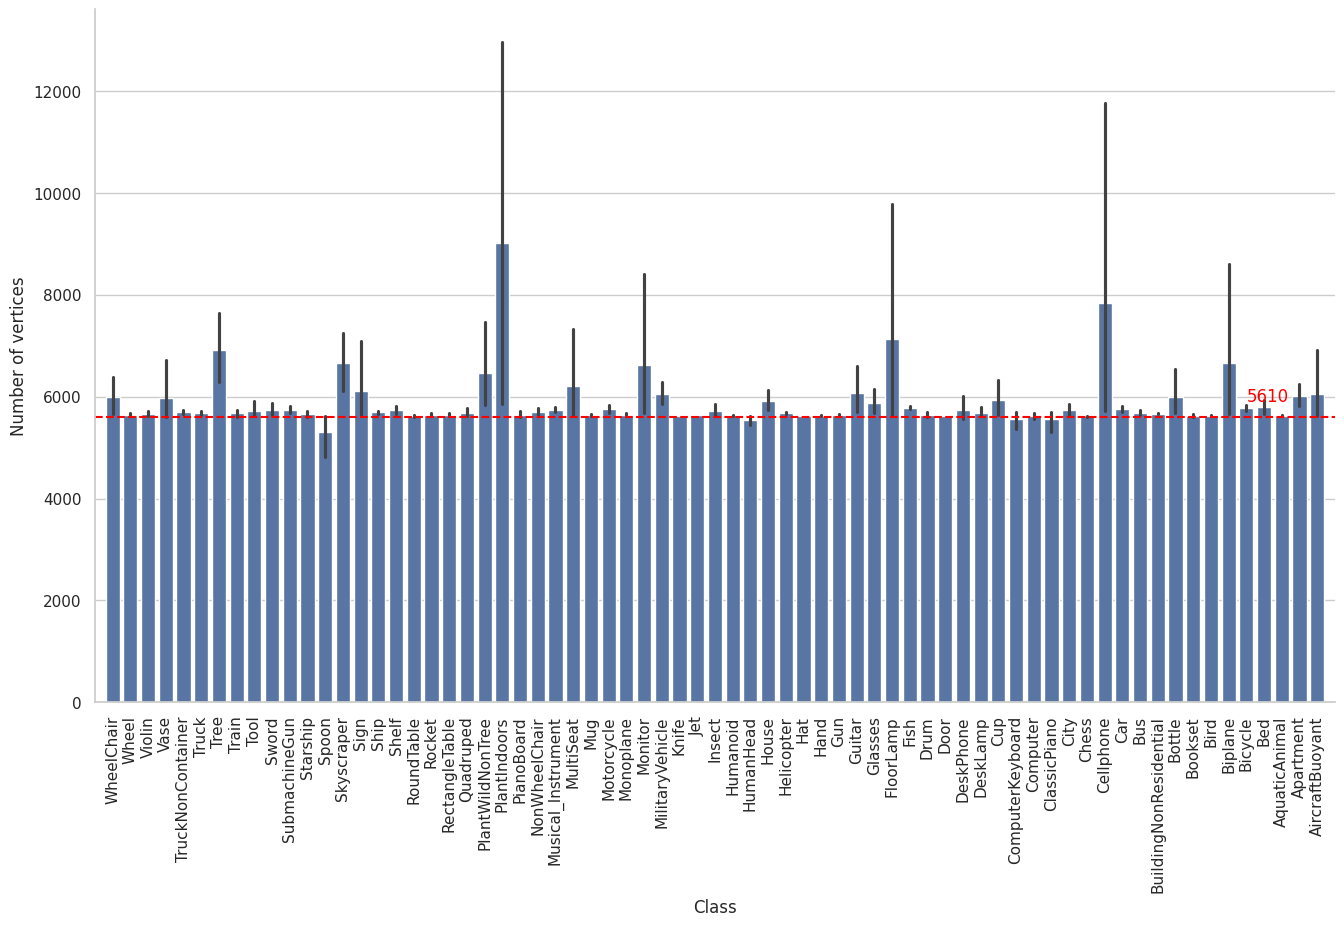

In [244]:
plot_attribute(df, "class", "nvertices", "mean", 5610)

show vertex for entire dataset rather than per class

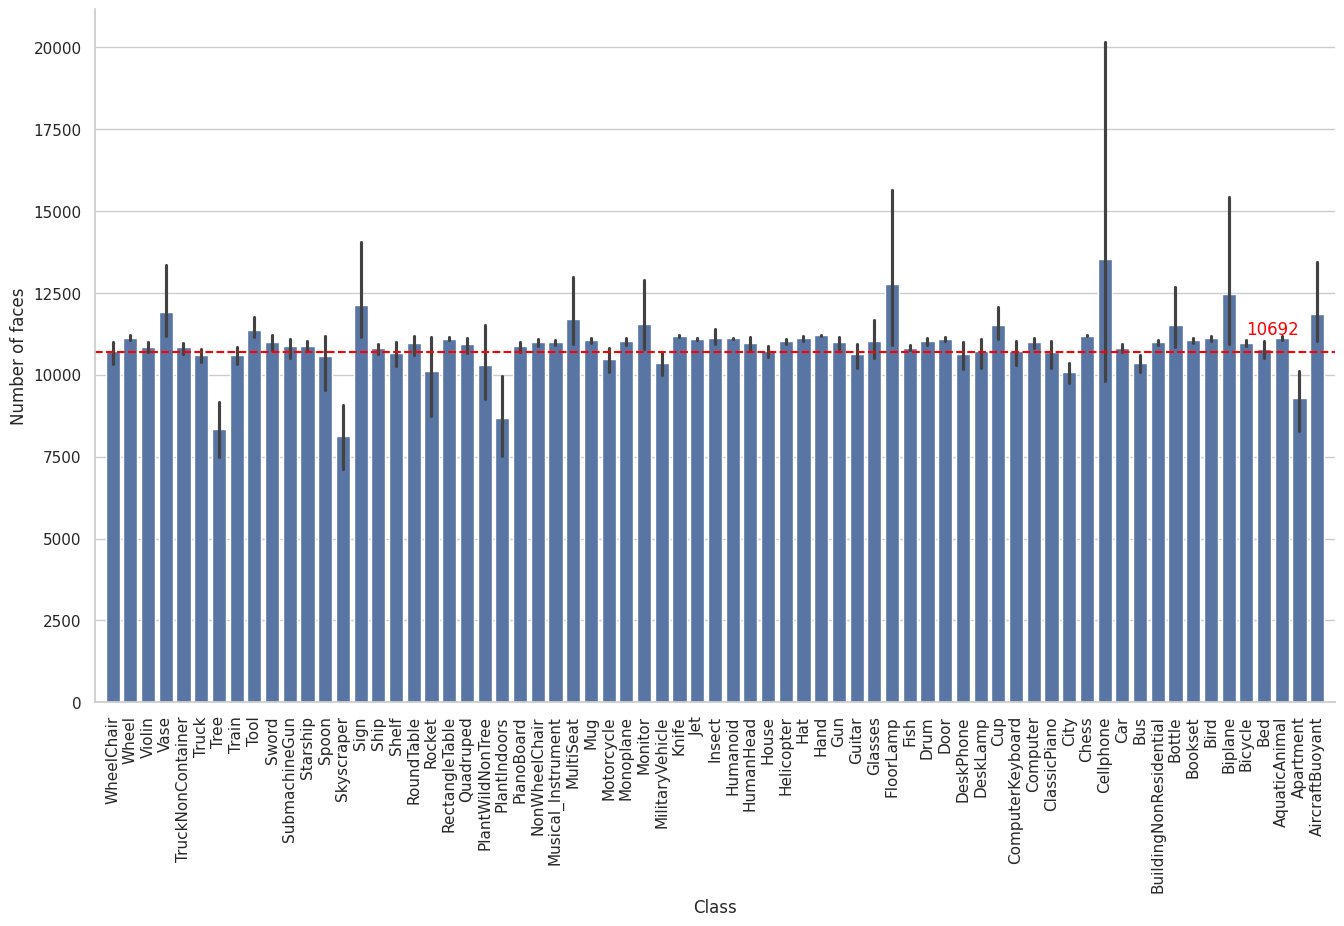

In [245]:
plot_attribute(df, "class", "nfaces", "mean", 10692)

In [23]:
df[(df["nfaces"] < 100) | (df["nvertices"] < 100)]

,name,class,nfaces,nvertices,face_type,bounding_box


In [37]:
classes = [class_type for class_type in os.listdir(shape_path) if os.path.isdir((os.path.join(shape_path, class_type))) and class_type != ".git"]
center_of_mass_diff = []
scaling_check = []
scaling_axes = []
for class_type in tqdm(classes):
    class_path = os.path.join(shape_path, class_type)
    class_path_orig = os.path.join(shape_path + "_orig", class_type)

    for obj_name in os.listdir(class_path):
        obj_path = os.path.join(class_path, obj_name)
        obj_path_orig = os.path.join(class_path_orig, obj_name)

        obj = MeshObject(obj_path, False)
        obj_orig = MeshObject(obj_path_orig, False)

        # center_of_mass_diff += [np.round(np.zeros(3) - obj.center_of_mass(), 6)]
        center_of_mass_diff += [np.round(np.linalg.norm(np.zeros(3)-obj.center_of_mass()), 6)]
        scaling_check += [[obj.volume(), obj_orig.volume(), obj_path]]
        scaling_axes += [obj.bounding_box]

center_of_mass_diff = np.asarray(center_of_mass_diff)
scaling_check = np.asarray(scaling_check)
scaling_axes = np.asarray(scaling_axes)

  1%|▏         | 1/69 [00:02<02:34,  2.27s/it]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7cf21d57d400>>
Traceback (most recent call last):
  File "/home/keddie/anaconda3/envs/mr_project/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
100%|██████████| 69/69 [01:54<00:00,  1.66s/it]


In [42]:
aux_scaling = {
    "x": np.abs(scaling_axes[:,0]) + np.abs(scaling_axes[:,1]), 
    "y": np.abs(scaling_axes[:,2]) + np.abs(scaling_axes[:,3]),
    "z": np.abs(scaling_axes[:,4]) + np.abs(scaling_axes[:,5])
    }

In [43]:
matrix_scale = [aux_scaling["x"], aux_scaling["y"], aux_scaling["z"]]
matrix_scale = np.asarray(matrix_scale)
matrix_scale.shape

(3, 2483)

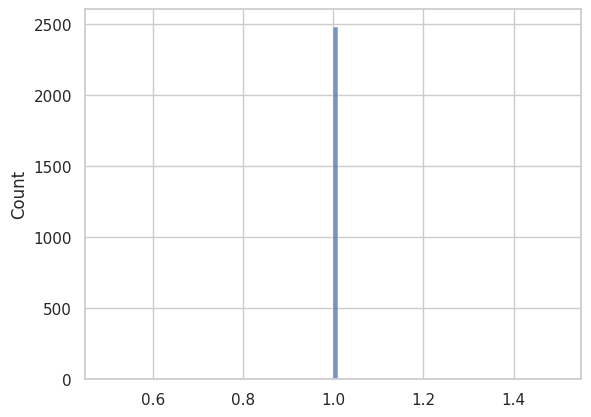

In [64]:
max_bb = np.round(np.max(matrix_scale, axis=0), 6)
sns.histplot(max_bb, bins=100) # longest axis
plt.savefig("longest_axis_after.png")

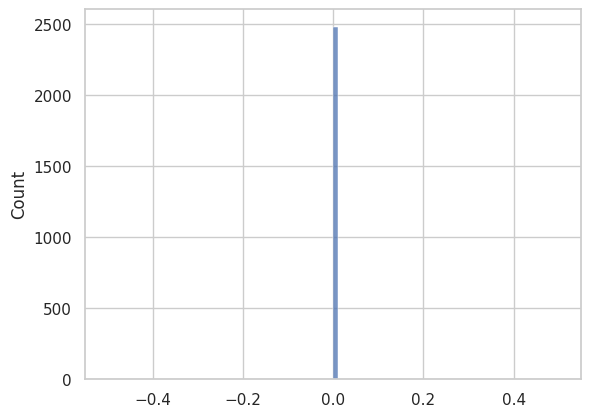

In [61]:
sns.histplot(center_of_mass_diff, bins=100) # diff between barycenter and origin
plt.savefig("diff_barycenter.png")

In [30]:
# show largest axis per shape instead of all axes

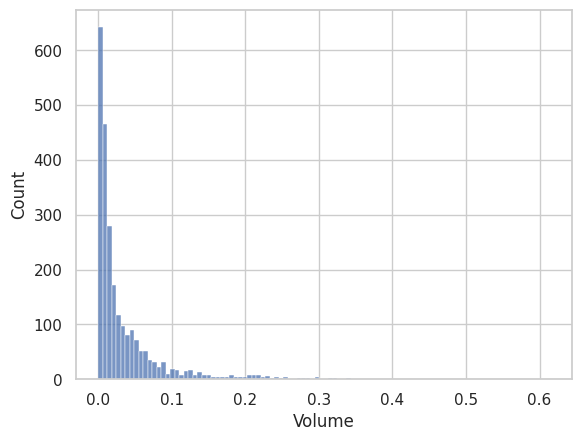

In [63]:
sns.histplot(x=scaling_check[:,0].astype(float), bins=100)
plt.xlabel("Volume")
plt.savefig("volume_check.png")

In [194]:
from Pipeline import *
pipeline = Pipeline()

vectors = {
    "normalized": [],
    "normalized_dot": [],
    "original": [],
    "original_dot": []
}
evalues = {
    "original": [],
    "normalized": []
}
for class_type in tqdm(classes):
    class_path = os.path.join(shape_path, class_type)
    class_path_orig = os.path.join(shape_path + "_orig", class_type)

    for obj_name in os.listdir(class_path):
        obj_path = os.path.join(class_path, obj_name)
        obj_path_orig = os.path.join(class_path_orig, obj_name)

        obj = MeshObject(obj_path, False)
        obj_orig = MeshObject(obj_path_orig, False)

        # center_of_mass_diff += [np.round(np.zeros(3) - obj.center_of_mass(), 6)]
        eigen_vals, eigen_vectors = pipeline._eigen_vectors(obj)
        eigen_vals_orig, eigen_vectors_orig = pipeline._eigen_vectors(obj_orig)

        vectors["original_dot"] += [[
            np.round(np.abs(np.dot([1,0,0], eigen_vectors_orig[:,0])),5), # x axis and major eigen vector
            np.round(np.abs(np.dot([0,1,0], eigen_vectors_orig[:,0])),5), # y axis and major eigen vector
            np.round(np.abs(np.dot([0,0,1], eigen_vectors_orig[:,0])),5), # z axis and major eigen vector
            ]]
        vectors["original"] += [eigen_vectors_orig.T]

        vectors["normalized_dot"] += [[
            np.round(np.abs(np.dot([1,0,0], eigen_vectors[:,0])),5), # x axis and major eigen vector
            np.round(np.abs(np.dot([0,1,0], eigen_vectors[:,0])),5), # y axis and major eigen vector
            np.round(np.abs(np.dot([0,0,1], eigen_vectors[:,0])),5), # z axis and major eigen vector
            ]]
        vectors["normalized"] += [eigen_vectors.T]

        evalues["original"] += [eigen_vals_orig]
        evalues["normalized"] += [eigen_vals]

100%|██████████| 69/69 [01:50<00:00,  1.60s/it]


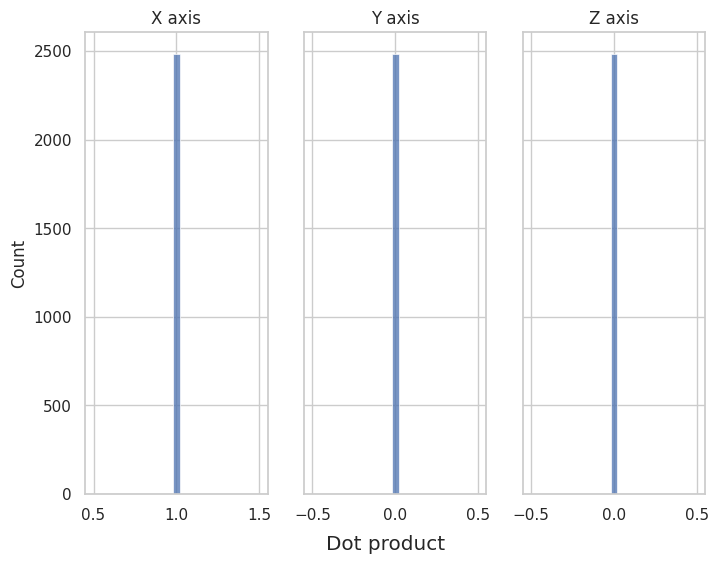

In [196]:
fig, axes = plt.subplots(1,3, figsize=(8,6), sharey=True)
vecs = np.asarray(vectors["normalized_dot"])
sns.histplot(vecs[:,0], bins=25, ax=axes[0]) # x axis
sns.histplot(vecs[:,1], bins=25, ax=axes[1]) # y axis
sns.histplot(vecs[:,2], bins=25, ax=axes[2]) # z axis
fig.supxlabel("Dot product")
axes[0].set_title("X axis")
axes[1].set_title("Y axis")
axes[2].set_title("Z axis")
plt.savefig("nornmalized_pca_dotproduct_majoreigenvector-xyzaxes.png")

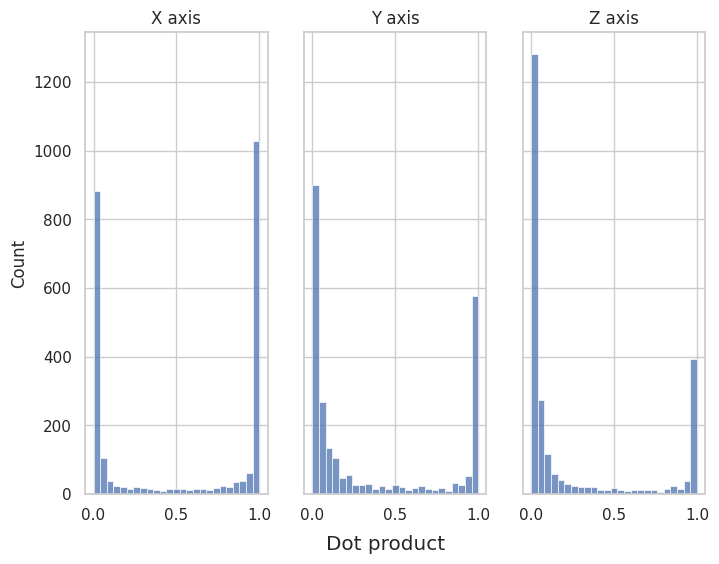

In [197]:
fig, axes = plt.subplots(1,3, figsize=(8,6), sharey=True)
vecs = np.asarray(vectors["original_dot"])
sns.histplot(vecs[:,0], bins=25, ax=axes[0]) # x axis
sns.histplot(vecs[:,1], bins=25, ax=axes[1]) # y axis
sns.histplot(vecs[:,2], bins=25, ax=axes[2]) # z axis
fig.supxlabel("Dot product")
axes[0].set_title("X axis")
axes[1].set_title("Y axis")
axes[2].set_title("Z axis")
plt.savefig("beforenorm_pca_dotproduct_majoreigenvector-xyzaxes.png")